<a href="https://colab.research.google.com/github/marianamoledomoreira/tcc_mba_cd/blob/main/clusterizacao_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install feature_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree

In [8]:
file_path = "bd_alunos_evadidos.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8')

In [9]:
print("Informações sobre as colunas:")
print(df.dtypes)

Informações sobre as colunas:
Unnamed: 0                 int64
CODALUNO                   int64
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                      int64
CODTURNOINGRESSO           int64
CODTURNOATUAL              int64
TURNOATUAL                object
CR                       float64
DISCIPLINA                object
NOTADISC                   int64
RESULTDISC                 int64
PERIODODISC                int64
ANOINGRESSO                int64
SEMESTREINGRESSO           int64
ANODESVINCULACAO           int64
SEMESTREDESVINCULACAO      int64
IDADE                      int64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                 int64
CHCURSADA                  int64
ESTADOCIVIL               object
TRANCAMENTOS 

In [10]:
df.shape

(9836, 35)

In [11]:
print("\nValores ausentes:")
print(df.isnull().sum())


Valores ausentes:
Unnamed: 0                  0
CODALUNO                    0
ACAOAFIRMATIVA              0
ENEMLINGUAGEM               0
ENEMHUMANAS                 0
ENEMNATURAIS                0
ENEMMATEMATICA              0
ENEMREDACAO                 0
CURSO                       0
CODTURNOINGRESSO            0
CODTURNOATUAL               0
TURNOATUAL                 14
CR                          0
DISCIPLINA                  0
NOTADISC                    0
RESULTDISC                  0
PERIODODISC                 0
ANOINGRESSO                 0
SEMESTREINGRESSO            0
ANODESVINCULACAO            0
SEMESTREDESVINCULACAO       0
IDADE                       0
COR                         0
BAIRRO                      0
CEP                      7847
CIDADE                      0
MOBILIDADE                  0
CHCURSADA                   0
ESTADOCIVIL                 0
TRANCAMENTOS                0
TEMPOPERMANENCIA            0
SEXO                        0
STATUSFORMACAO       

In [12]:
def agrupar_categorias(categoria):
    if categoria in ['Ciências Exatas e da Terra', 'Engenharias']:
        return 'Exatas'
    elif categoria in ['Ciências Sociais Aplicadas', 'Ciências Humanas']:
        return 'Humanas'
    else:
        return 'Outras'

In [13]:
df['Grupo_area_curso'] = df['AREACURSO'].apply(agrupar_categorias)
contagem_por_grupo_area_curso = df['Grupo_area_curso'].value_counts()
print("\nContagem por grupo 'Grupo_area_curso':")
print(contagem_por_grupo_area_curso)


Contagem por grupo 'Grupo_area_curso':
Humanas    4486
Exatas     3888
Outras     1462
Name: Grupo_area_curso, dtype: int64


In [14]:
frequencia_areafirmativa = df['ACAOAFIRMATIVA'].value_counts()
print("\nFrequência da variável 'ACAOAFIRMATIVA':")
print(frequencia_areafirmativa)


Frequência da variável 'ACAOAFIRMATIVA':
AC    7712
A1     578
L2     570
L4     548
L1     235
L3     193
Name: ACAOAFIRMATIVA, dtype: int64


In [15]:
def categorias_to_grupo(categoria):
    if categoria in ['AC', 'A0']:
        return 'Ampla Concorrência'
    else:
        return 'Ações Afirmativas'

In [16]:
df['Grupo_criterio'] = df['ACAOAFIRMATIVA'].apply(categorias_to_grupo)
contagem_por_grupo_criterio = df['Grupo_criterio'].value_counts()
print("\nContagem por grupo 'Grupo_criterio':")
print(contagem_por_grupo_criterio)


Contagem por grupo 'Grupo_criterio':
Ampla Concorrência    7712
Ações Afirmativas     2124
Name: Grupo_criterio, dtype: int64


In [17]:
colunas_excluir = ['CODALUNO', 'STATUSFORMACAO', 'CR', 'CURSO', 'CODTURNOINGRESSO', 'CODTURNOATUAL',
                   'DISCIPLINA', 'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANODESVINCULACAO',
                   'SEMESTREDESVINCULACAO', 'BAIRRO', 'CEP', 'CIDADE', 'CHCURSADA', 'TRANCAMENTOS',
                   'TEMPOPERMANENCIA', 'NOME_CURSO', 'MOBILIDADE', 'Unnamed: 0', 'ACAOAFIRMATIVA', 'AREACURSO', 'TURNOATUAL']

df = df.drop(colunas_excluir, axis=1)

In [18]:
cat_features = ['Grupo_criterio', 'SEMESTREINGRESSO', 'COR', 'ESTADOCIVIL', 'SEXO', 'Grupo_area_curso']
df[cat_features] = df[cat_features].astype(str)
onehot = OneHotEncoder(variables=cat_features)
X_transform = onehot.fit_transform(df)
X_transform

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,ANOINGRESSO,IDADE,Grupo_criterio_Ampla Concorrência,Grupo_criterio_Ações Afirmativas,SEMESTREINGRESSO_1,...,COR_NEGRA,COR_INDÍGENA,COR_AMARELA,ESTADOCIVIL_SOLTEIRO,ESTADOCIVIL_CASADO,SEXO_M,SEXO_F,Grupo_area_curso_Humanas,Grupo_area_curso_Outras,Grupo_area_curso_Exatas
0,485.0,593.3,521.5,633.1,840.0,2012,42,1,0,1,...,0,0,0,1,0,1,0,1,0,0
1,632.1,653.4,564.2,662.4,640.0,2012,39,1,0,1,...,0,0,0,1,0,0,1,1,0,0
2,597.9,608.3,583.3,703.2,660.0,2012,23,1,0,1,...,0,0,0,1,0,0,1,1,0,0
3,598.7,555.8,565.9,612.3,700.0,2012,25,1,0,1,...,0,0,0,1,0,1,0,1,0,0
4,635.4,613.4,575.3,679.9,500.0,2012,37,1,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,540.8,558.0,574.4,610.8,620.0,2014,24,1,0,0,...,0,0,0,1,0,1,0,1,0,0
9832,527.2,539.0,438.4,551.1,480.0,2014,36,1,0,0,...,0,0,0,1,0,1,0,1,0,0
9833,541.6,731.4,509.3,452.0,320.0,2014,57,1,0,0,...,0,0,0,1,0,1,0,1,0,0
9834,504.6,599.8,466.2,551.8,540.0,2014,23,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [19]:
min_max = MinMaxScaler()
min_max.set_output(transform='pandas')
X_transform = min_max.fit_transform(X_transform)
X_transform

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,ANOINGRESSO,IDADE,Grupo_criterio_Ampla Concorrência,Grupo_criterio_Ações Afirmativas,SEMESTREINGRESSO_1,...,COR_NEGRA,COR_INDÍGENA,COR_AMARELA,ESTADOCIVIL_SOLTEIRO,ESTADOCIVIL_CASADO,SEXO_M,SEXO_F,Grupo_area_curso_Humanas,Grupo_area_curso_Outras,Grupo_area_curso_Exatas
0,0.561224,0.670017,0.617014,0.623363,0.822222,0.0,0.488372,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.775656,0.737888,0.667534,0.657624,0.600000,0.0,0.418605,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.725802,0.686957,0.690133,0.705332,0.622222,0.0,0.046512,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.726968,0.627668,0.669546,0.599041,0.666667,0.0,0.093023,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.780466,0.692716,0.680667,0.678087,0.444444,0.0,0.372093,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,0.642566,0.630152,0.679602,0.597287,0.577778,1.0,0.069767,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9832,0.622741,0.608696,0.518694,0.527479,0.422222,1.0,0.348837,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9833,0.643732,0.825974,0.602579,0.411600,0.244444,1.0,0.837209,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9834,0.589796,0.677357,0.551585,0.528297,0.488889,1.0,0.046512,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [20]:
var_feature_importance = VarianceThreshold(0.21)
var_feature_importance.set_output(transform='pandas')
X_transform_filtered = var_feature_importance.fit_transform(X_transform)
X_transform_filtered.columns

Index(['SEMESTREINGRESSO_1', 'SEMESTREINGRESSO_2', 'SEXO_M', 'SEXO_F',
       'Grupo_area_curso_Humanas', 'Grupo_area_curso_Exatas'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

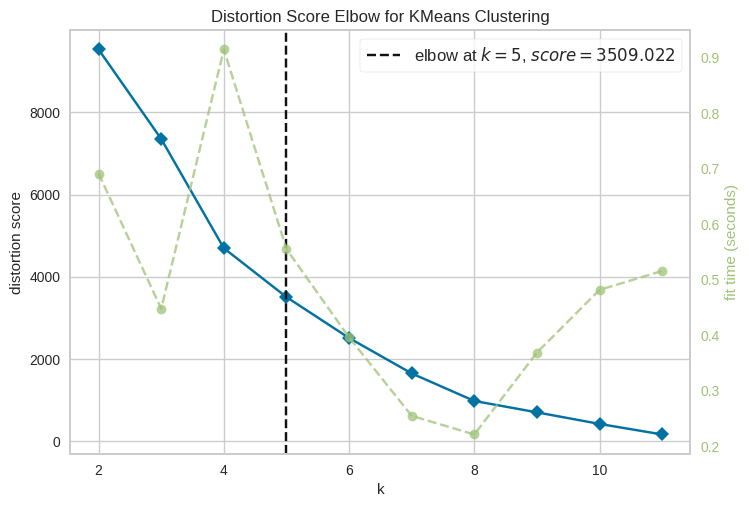

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
model_cluster = KMeans(random_state=42, max_iter=1000)
visualizer = KElbowVisualizer(model_cluster, k=(2, 12))
visualizer.fit(X_transform_filtered)
visualizer.show()

In [22]:
model_cluster = KMeans(n_clusters=visualizer.elbow_value_)
model_cluster.fit(X_transform_filtered)
cluster_labels = model_cluster.predict(X_transform_filtered)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
X_transform_filtered['cluster_name'] = cluster_labels

In [24]:
summary_values = X_transform_filtered.groupby('cluster_name').size().reset_index(name='count_values')
summary_values

,cluster_name,count_values
0,0,1909
1,1,1752
2,2,1238
3,3,2584
4,4,2353


In [25]:
summary = X_transform_filtered.groupby(['cluster_name']).mean()
summary

,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,SEXO_M,SEXO_F,Grupo_area_curso_Humanas,Grupo_area_curso_Exatas
cluster_name,,,,,,
0,0.0,1.0,0.0,1.0,0.518596,0.300157
1,1.0,0.0,1.0,0.0,0.000000,0.799087
2,1.0,0.0,1.0,0.0,1.000000,0.000000
3,1.0,0.0,0.0,1.0,0.484133,0.298375
4,0.0,1.0,1.0,0.0,0.427964,0.486188


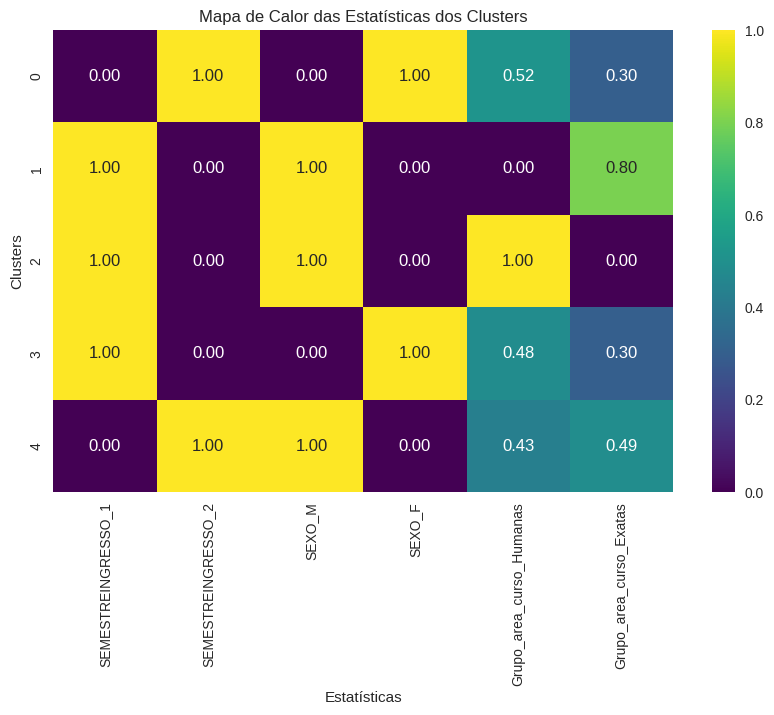

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(summary, annot=True, cmap='viridis', fmt=".2f")
plt.xlabel('Estatísticas')
plt.ylabel('Clusters')
plt.title('Mapa de Calor das Estatísticas dos Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


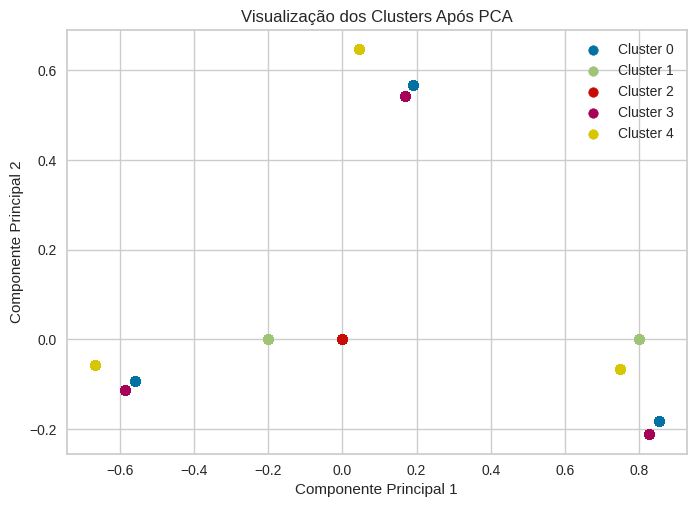

In [27]:
# Criar subconjuntos de dados para cada cluster
clusters_data = []
for cluster_id in range(visualizer.elbow_value_):
    cluster_data = X_transform_filtered[X_transform_filtered['cluster_name'] == cluster_id].drop('cluster_name', axis=1)
    clusters_data.append(cluster_data)

# Aplicar PCA para cada subconjunto de dados do cluster
pca_models = []
for cluster_data in clusters_data:
    pca = PCA(n_components=2)
    pca.fit(cluster_data)
    pca_models.append(pca)

# Plotar os resultados do PCA para cada cluster
for cluster_id, pca_model in enumerate(pca_models):
    cluster_data = clusters_data[cluster_id]
    reduced_data = pca_model.transform(cluster_data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label=f'Cluster {cluster_id}')

plt.legend()
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters Após PCA')
plt.show()

In [28]:
# Calcular o Silhouette Score para os clusters
silhouette_avg = silhouette_score(X_transform_filtered.drop('cluster_name', axis=1), cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6116517106450475


[Text(0.5555555555555556, 0.875, 'SEXO_F <= 0.5\ngini = 0.789\nsamples = 9836\nvalue = [1909, 1752, 1238, 2584, 2353]'),
 Text(0.3333333333333333, 0.625, 'SEMESTREINGRESSO_2 <= 0.5\ngini = 0.645\nsamples = 5343\nvalue = [0, 1752, 1238, 0, 2353]'),
 Text(0.2222222222222222, 0.375, 'Grupo_area_curso_Humanas <= 0.5\ngini = 0.485\nsamples = 2990\nvalue = [0, 1752, 1238, 0, 0]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1752\nvalue = [0, 1752, 0, 0, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1238\nvalue = [0, 0, 1238, 0, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 2353\nvalue = [0, 0, 0, 0, 2353]'),
 Text(0.7777777777777778, 0.625, 'SEMESTREINGRESSO_1 <= 0.5\ngini = 0.489\nsamples = 4493\nvalue = [1909, 0, 0, 2584, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1909\nvalue = [1909, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2584\nvalue = [0, 0, 0, 2584, 0]')]

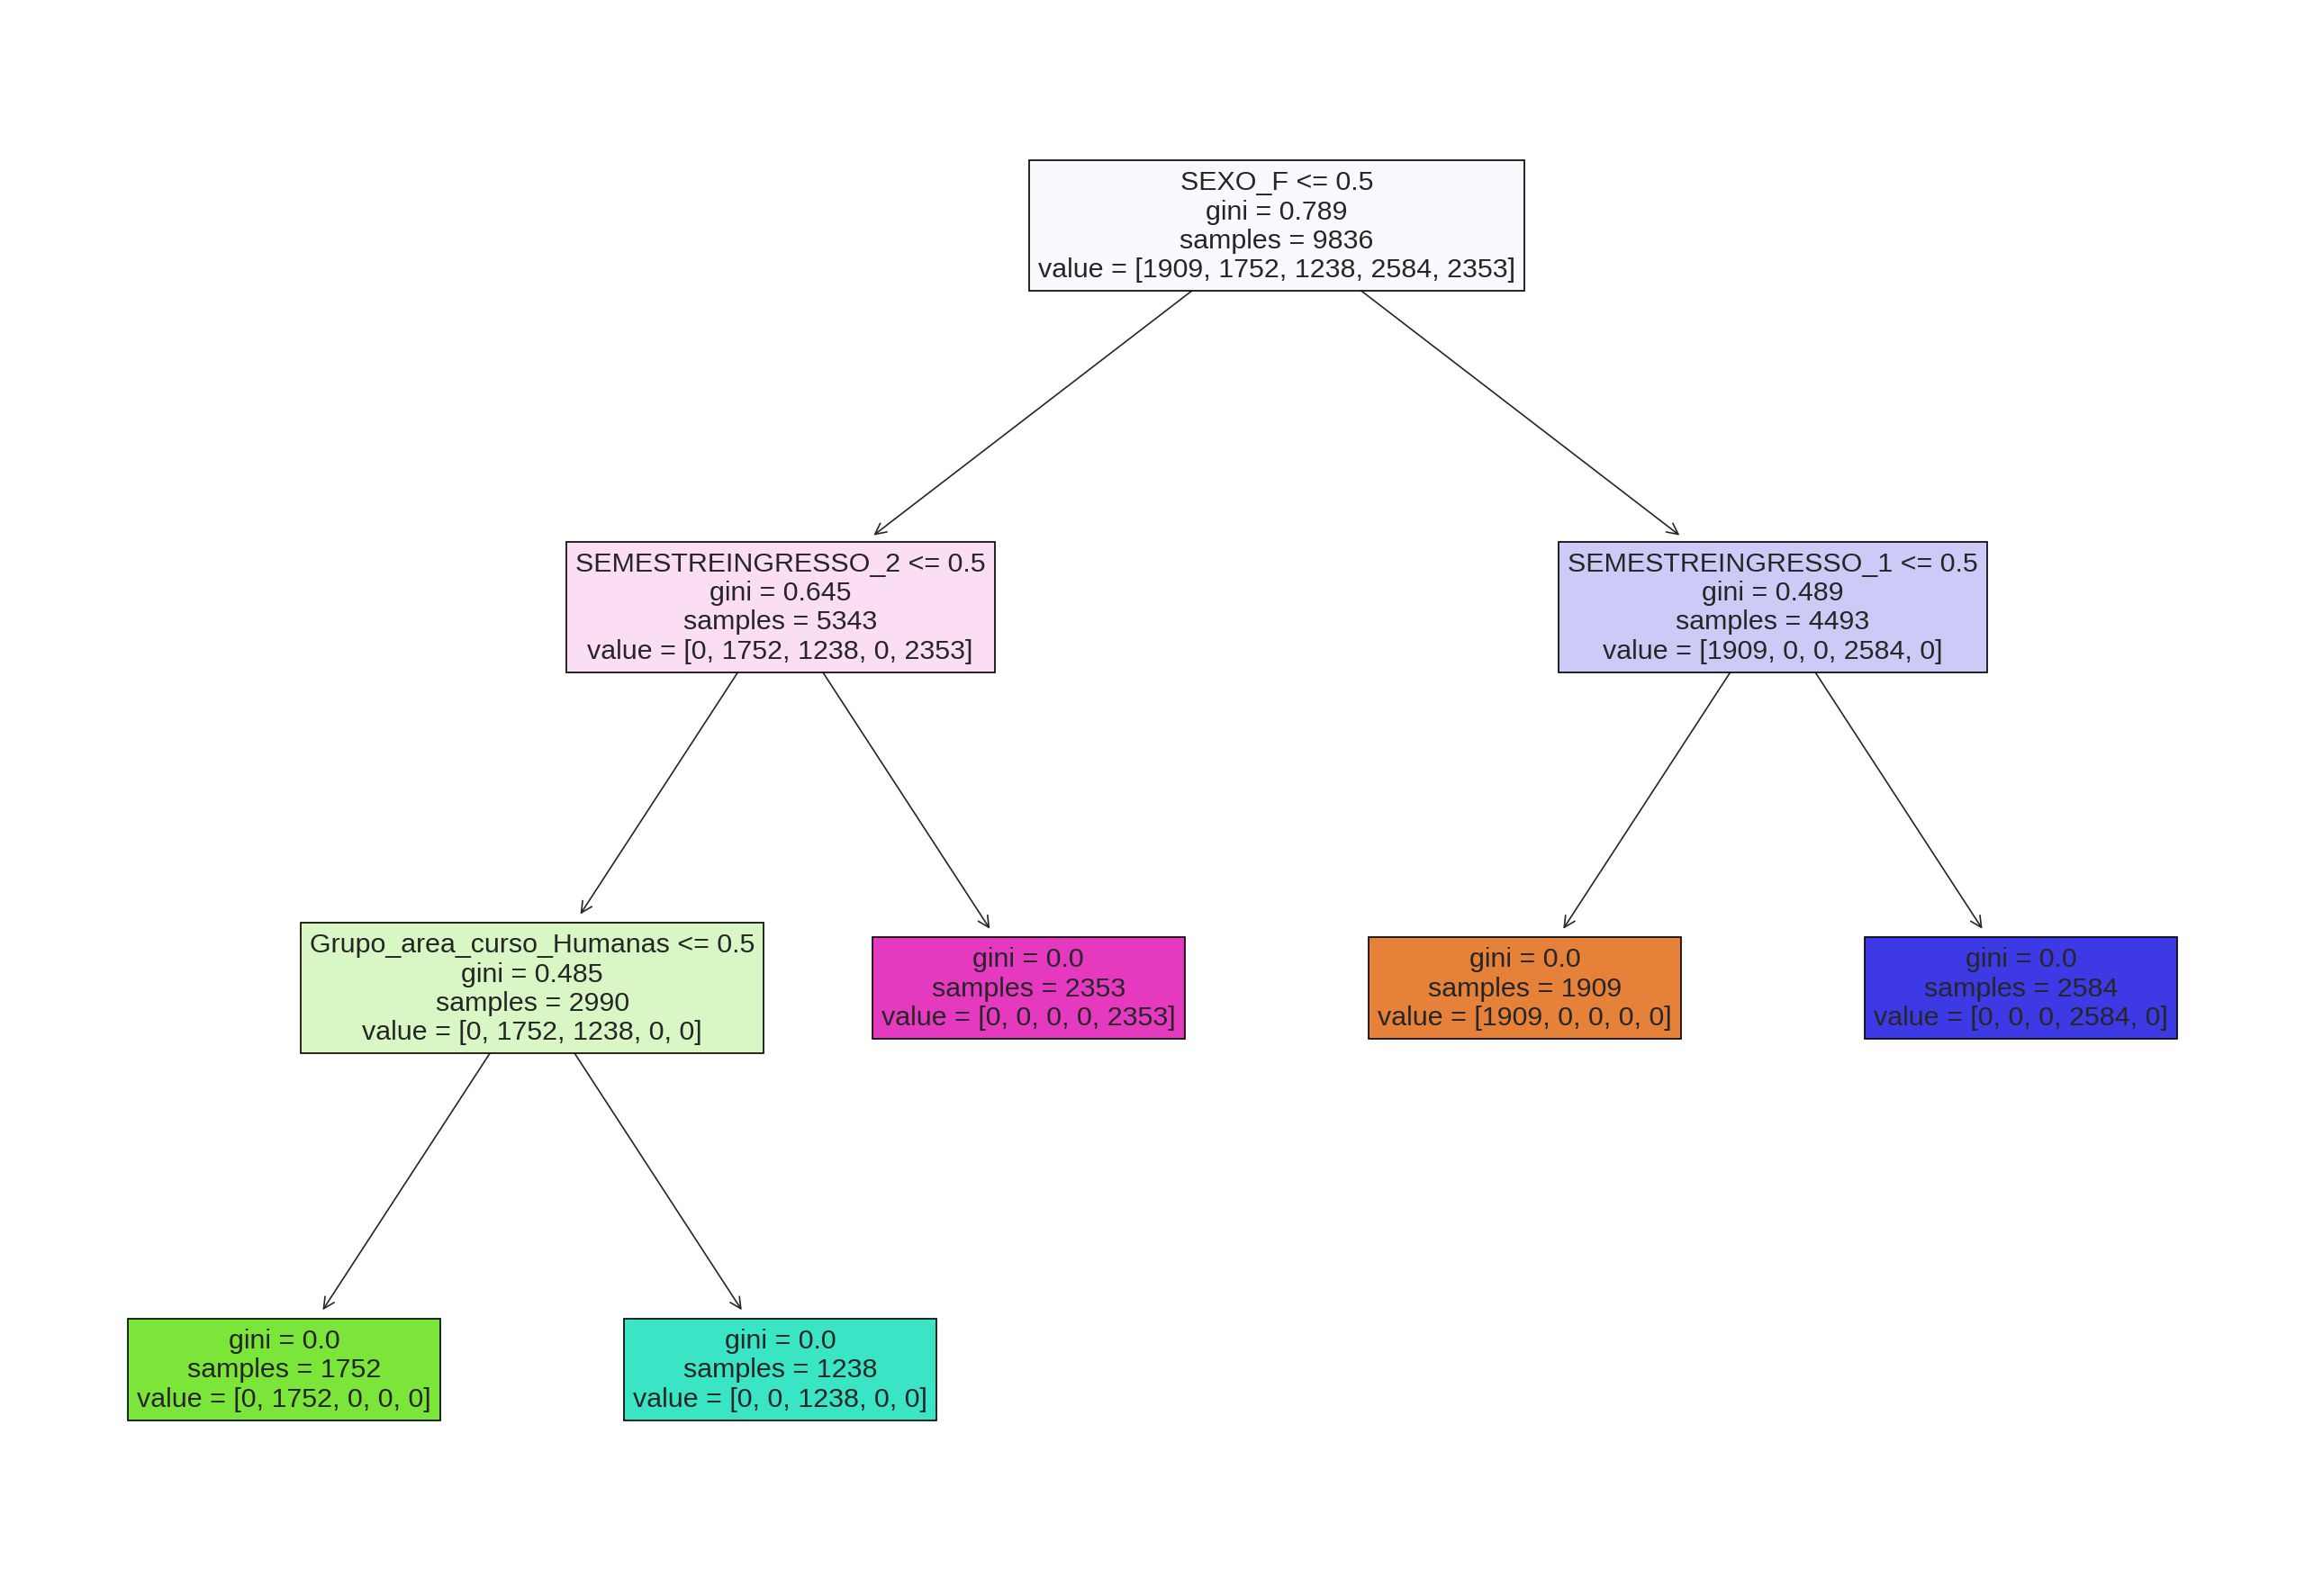

In [29]:
features = X_transform_filtered.columns.tolist()[:-1]

target = 'cluster_name'

clf = tree.DecisionTreeClassifier()

clf.fit(X_transform_filtered[features], X_transform_filtered[target])

# %%

plt.figure(dpi=400)
tree.plot_tree(clf,feature_names=features,
                filled=True)